In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [6]:
# to get details of categorical columns
col=df.columns
numeric_columns=df._get_numeric_data().columns
categorical_columns=list(set(col)-set(numeric_columns))
new=df[categorical_columns]
new.describe().T

count unique        top  freq
sex     1338      2       male   676
smoker  1338      2         no  1064
region  1338      4  southeast   364

In [7]:
#Checking for NaN Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

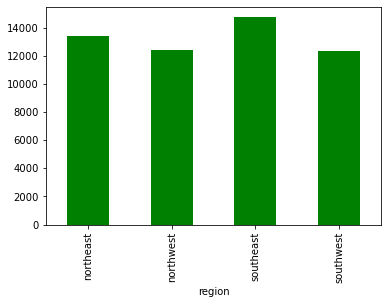

In [8]:
df.groupby('region')['charges'].mean().plot(kind='bar',color='green')

**Southeast region has a bit more charge than other regions.**

Text(0, 0.5, 'Charges')

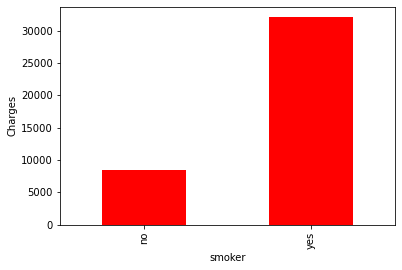

In [9]:
df.groupby('smoker')['charges'].mean().plot(kind='bar',color='red')
plt.ylabel('Charges')

**Clearly, average charge for smoker is much more than the ones who don't smoke.**

Text(0, 0.5, 'Charges')

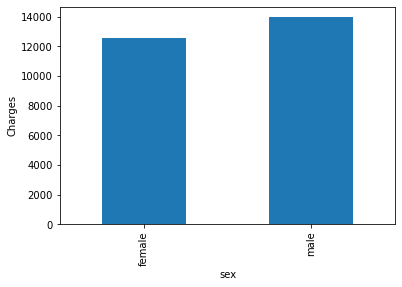

In [10]:
df.groupby('sex')['charges'].mean().plot(kind='bar')
plt.ylabel('Charges')

Charges for Both Male and Female are nearly same, slightly more for male.

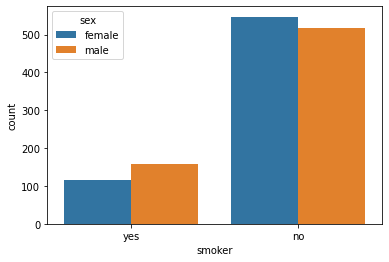

In [11]:
sns.countplot(x=df.smoker,hue=df.sex)

No of Male smoker is greater than Female smoker.

Text(0, 0.5, 'Charges')

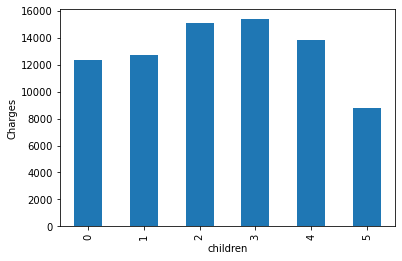

In [12]:
# Charge based on number of childrens
df.groupby('children')['charges'].mean().plot(kind='bar')
plt.ylabel('Charges')

People with 3 children have highest charge whereas people with 5 children has lowest.

In [13]:
px.scatter(df,x='smoker',y='age')

As it is clear from the graph,All age group people smoke.

**Analysing Charge Based On BMI Value**

**According to BMI Table:**
<font color='red'>
- A person is **Underweight** if BMI is less than 18.5
- A person is **Normal** if BMI is 18.5 to <25
- A person is **Overweight** if BMI is 25 to <30
- A person is **Obese** if BMI is 30.0 or higher

In [14]:
def func(arg):
    if arg<18.5:
        return 'UnderWeight'
    elif 18.5<arg and arg<25:
        return 'Normal'
    elif 25<arg and arg<30:
        return 'OverWeight'
    else:
        return 'Obese'
new=df.copy()
new.bmi=new['bmi'].apply(func)

In [53]:
fig=px.scatter(new,x='age',y='charges',color='bmi',size='charges')
fig.show()

Clearly, Charge for Obese people is Higher in every age range.

In [60]:
px.scatter(new,x='bmi',y='age')

Even people as young as 18 years are obese/Overweight.

**charge distribution for Obese vs Non obese**

Text(0.5, 1.0, 'Charge Distribution for Non Obese People')

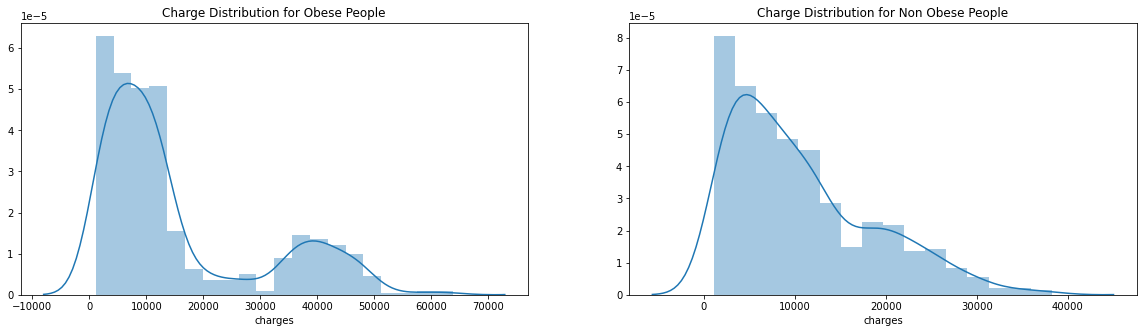

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df[df.bmi>30].charges)
plt.title('Charge Distribution for Obese People')
plt.subplot(1,2,2)
sns.distplot(df[df.bmi<30].charges)
plt.title('Charge Distribution for Non Obese People')

Clearly, Charge for obese individuals are higher than the ones who aren't obese

In [78]:
fig=px.scatter(df,x='age',y='charges',color='smoker',size='charges')
fig.show()
#sns.scatterplot(x=df.age,y=df.charges,hue=df.smoker)
sns.lmplot(x='age',y='charges',hue='smoker',data=df)

Clearly,Charges for smoker is much more than that for non smoker in every age group.

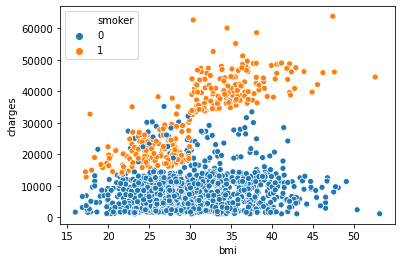

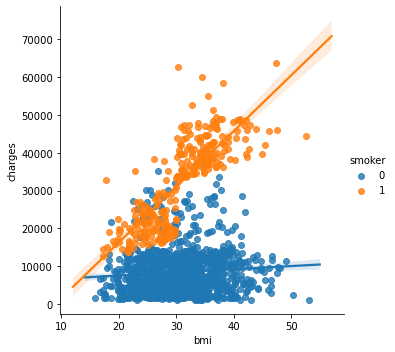

In [159]:
sns.scatterplot(x=df.bmi,y=df.charges,hue=df.smoker)
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df)

Insurance charge for smokers increases in proportion to BMI.Whereas,for non-smokers the increase in charge with increase in
bmi is not much.

## Handling Categorical Columns

## One Hot Encoding

In [15]:
# For Sex
df=pd.concat([df,pd.get_dummies(df.sex,drop_first=True)],axis=1).drop(['sex'],axis=1)

In [16]:
# For Smoker
df=pd.concat([df,pd.get_dummies(df.smoker,drop_first=True)],axis=1).drop(['smoker'],axis=1)
df.rename(columns={'yes':'smoker'},inplace=True)

In [17]:
# For region
df=pd.concat([df,pd.get_dummies(df.region,drop_first=True)],axis=1).drop(['region'],axis=1)

In [18]:
# Re-indexing charges to last column
temp=df.charges
df.drop(['charges'],axis=1,inplace=True)
df['charges']=temp

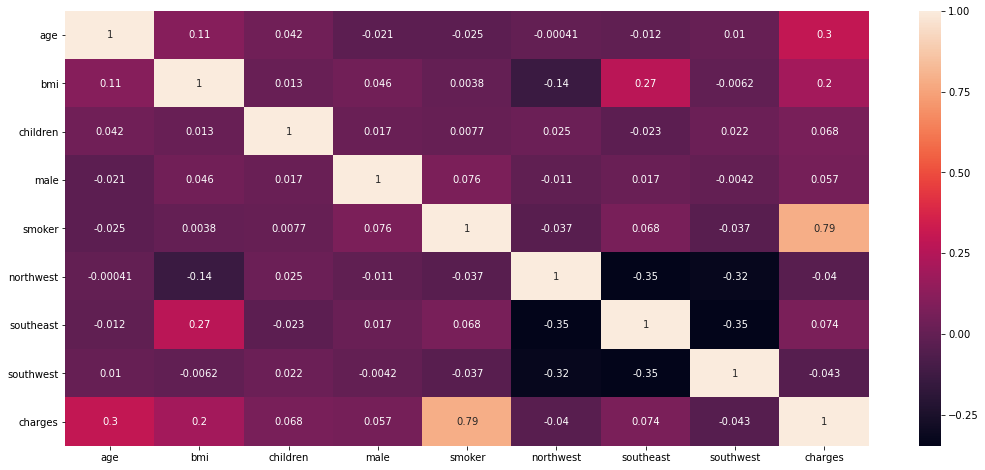

In [19]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

It can be concluded from heatmap that Region is not an important feature for determining charges, So we can drop the region column.

In [20]:
df.drop(['northwest','southeast','southwest'],axis=1,inplace=True)

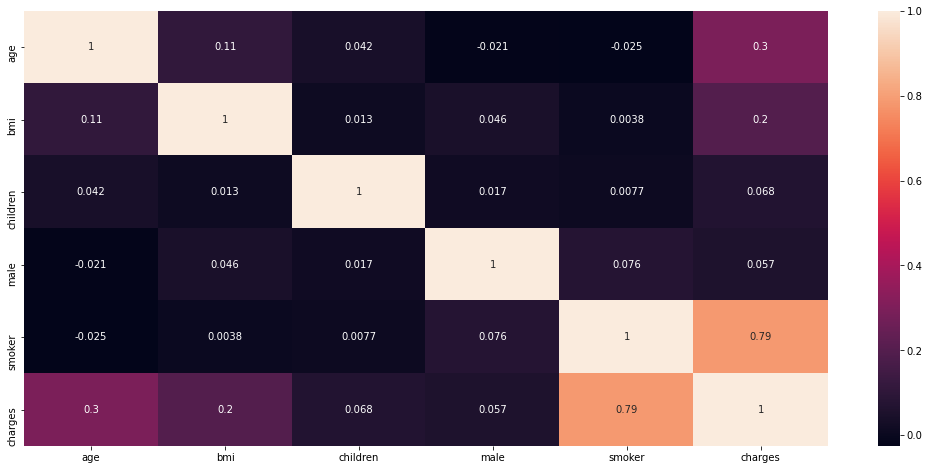

In [113]:
#Heatmap after dropping region column
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

## Model

In [21]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
print('Test Score(r2) : {} '.format(r2_score(y_pred,y_test))) #
#Avg score using cross val score
print('Cross Val Score : {}'.format(cross_val_score(lin_reg,X_train,y_train,cv=10).mean()))

Test Score(r2) : 0.7238911072887935 
Cross Val Score : 0.7273727994870052


## Ridge Regression

In [117]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-12,1e-10,1e-8,1e-5,1e-2,1e-1,1,2,3,4,7,10,20,25,30,40,50,56,60,70,80,90,100,125,149,150,175,200]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=10)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_score_)
ridge_regressor.best_params_

0.7274313153251271


{'alpha': 7}

In [126]:
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
print('Test Score {}'.format(r2_score(y_test,y_pred_ridge)))
print('Cross Val Score : {}'.format(cross_val_score(ridge,X_train,y_train,cv=10).mean()))

Test Score 0.7971676611353236
Cross Val Score : 0.7274310450851491


## Lasso Regression

In [120]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-12,1e-10,1e-8,1e-5,1e-2,1e-1,1,2,3,4,7,10,20,25,30,40,50,56,60,70,80,90,100,125,150,175,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_regressor.fit(X_train,y_train)
display(lasso_regressor.best_params_)
display(lasso_regressor.best_score_)

{'alpha': 40}

0.7309204207582325

In [127]:
lasso=Lasso(alpha=7)
lasso.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
print('Test Score: {}'.format(r2_score(y_test,y_pred_ridge)))
print('Cross Val Score : {}'.format(cross_val_score(lasso,X_train,y_train,cv=10).mean()))

Test Score: 0.7971676611353236
Cross Val Score : 0.727414661047234


# Polynomail Regression

In [113]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
lin_poly_reg=LinearRegression()

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


lin_poly_reg.fit(X_train_poly,y_train)

y_pred_poly=lin_poly_reg.predict(X_test_poly)

print('Test Score(r2) : {} '.format(r2_score(y_test,y_pred_poly)))
cross_val_score(lin_poly_reg,X_train_poly,y_train,cv=10).mean()

Test Score(r2) : 0.880867352630166 


0.8248423284356112

## Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

# Without Hyperparameter tuning

forest.fit(X_train,y_train)
y_pred_forest=forest.predict(X_test)
print('Test Score : {} '.format(r2_score(y_test,y_pred_forest)))
print('Cross Val Score : {}'.format(cross_val_score(forest,X_train,y_train,cv=10).mean()))
# No Overfitting

Test Score : 0.8766152602188266 
Cross Val Score : 0.8072917702568052


In [30]:
#Parameter tuning

params={
    'n_estimators':[20,50,70,100,150,400,500,700,1000],
    'max_depth':[2,5,8,10,15,20],
    'min_samples_split':[2,3,6,9,14,20],
    'min_samples_leaf':[1,2,5,8,9,12],
    'max_leaf_nodes':[3,6,9,15,21],
    'bootstrap':['True','False']
    }
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(forest,param_distributions=params,n_iter=25,cv=10)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=25,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [2, 5, 8, 10, 15, 20],
                                        'max_leaf_nodes': [3, 6, 9, 15, 21],
                                        'min_samples_leaf': [1, 2, 5, 8, 9, 12],
                                        'min_samples_split': [2, 3, 6, 9, 14,
                                                              20],
                                        'n_estimators': [20, 50, 70, 100, 150,
                                                         400, 500, 700, 1000]})

In [31]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_leaf_nodes': 15,
 'max_depth': 5,
 'bootstrap': 'True'}

In [130]:
forest_tuned=RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=9,max_leaf_nodes=15,
                                  max_depth=5,bootstrap=True,random_state=8)
forest_tuned.fit(X_train,y_train)
y_pred_forest_tuned=forest_tuned.predict(X_test)
print('Test Score {}'.format(r2_score(y_test,y_pred_forest_tuned)))
print('Cross Val Score {}'.format(cross_val_score(forest_tuned,X_train,y_train,cv=10).mean()))

Test Score 0.8980883319639053
Cross Val Score 0.8455364562360822


## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred_tree=tree.predict(X_test)
print('Test Score : {}'.format(r2_score(y_test,y_pred_tree)))
print('Cross Val Score : {}'.format(cross_val_score(tree,X_train,y_train,cv=10).mean()))

Test Score : 0.7239692228339822
Cross Val Score : 0.6661763643298532


## XGBosot

In [135]:
import xgboost
xgb=xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
print(r2_score(y_test,y_pred_xgb))

0.8543091111065985


In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
params={
  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
    }
rs=RandomizedSearchCV(xgb,param_distributions=params,n_iter=25,cv=10)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos

In [138]:
rs.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [147]:
xgb=xgboost.XGBRegressor(min_child_weight=7,max_depth=3,learning_rate=0.3,gamma=0.0,colsample_bytree=0.4)
xgb.fit(X_train,y_train)
print('Test Score : {}'.format(r2_score(y_test,xgb.predict(X_test))))
print('Cross Val Score : {}'.format(cross_val_score(xgb,X_train,y_train,cv=10).mean()))

Test Score : 0.8836496524571781
Cross Val Score : 0.8275919283101965


## Random Forest fits the best

Text(0.5, 1.0, 'Difference between Actual and Predicted')

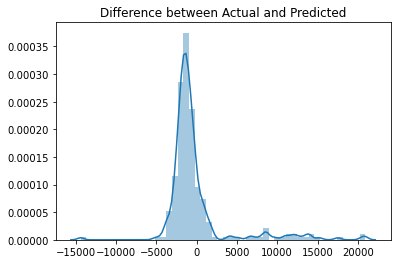

In [161]:
sns.distplot(y_test-y_pred_forest_tuned)
plt.title('Difference between Actual and Predicted')

Text(0, 0.5, 'Predicted Charge')

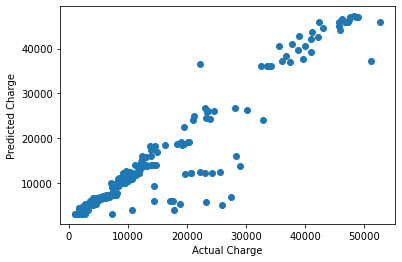

In [153]:
plt.scatter(y_test,y_pred_forest_tuned)
plt.xlabel('Actual Charge')
plt.ylabel('Predicted Charge')